# Classification model using Decision Tree

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload RNA data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,12.164384,1.374775,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,61.906849,1.374775,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361


In [3]:
X = data[['AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
# X = data[['AC002486.3', 'AC003986.5', 'AC004158.3', 'AC004221.2', 'AC005392.13', 'AC005498.4', 'AC006296.2', 'AC006372.6', 'AC011516.2', 'AC012363.13', 'AC017048.2', 'AC018359.1', 'AC091814.2', 'AC092933.4', 'BSN-AS2', 'CDKN2AIPNLP2', 'CTB-49A3.1', 'GLUD1P4', 'GLULP6', 'LRRC34P1', 'MARCKSL1P2', 'OR10B1P', 'OR2B8P', 'OSBPL9P1', 'RNA5SP205', 'RNF212', 'RP11-123J14.1', 'RP3-406P24.4', 'RP4-581O6.1', 'XXyac-YR12DB5.1']]
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)




print(X)
print('Numero de pacientes: ',len(Y))

     AC005307.1   ATP5G2P1    DLGAP4  EIF4A1P9  FAM172BP   FAM224A      GJA9  \
0     21.055379  21.300337  34.54982  21.37925  21.62929  21.12373  29.68286   
1     21.055379  21.300337  34.06647  21.37925  21.62929  21.12373  26.80539   
2     21.055379  21.300337  34.42561  25.08766  29.29206  21.12373  30.09292   
3     21.055379  21.300337  34.41176  26.76156  21.62929  21.12373  29.29223   
4     21.055379  21.300337  34.29088  21.37925  21.62929  21.12373  32.00382   
..          ...        ...       ...       ...       ...       ...       ...   
176   20.944668  21.624881  34.55658  21.78113  21.49653  20.98542  28.18967   
177   20.944668  21.624881  33.15506  21.78113  21.49653  20.98542  28.18967   
178   20.944668  21.624881  34.68047  21.78113  25.64475  23.49110  28.18967   
179   20.944668  21.624881  35.60014  21.78113  21.49653  20.98542  33.92530   
180   20.944668  21.624881  35.23053  21.78113  21.49653  20.98542  28.18967   

       GPR155      GYPE      IL25  ... 

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [2,5,7],
              'min_samples_split': [2, 5],
              'max_depth':[2,5,10,12],
              'criterion':['entropy','gini'],
              'splitter': ['best', 'random'],
              'random_state':[125]}


# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 12],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [2, 5], 'random_state': [125],
                         'splitter': ['best', 'random']})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=125,
                       splitter='random')

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.6810344827586207


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9097222222222222
Final accuracy on the testing dataset: 0.4864864864864865


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[56  9]
 [ 4 75]]
Input data:  [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0]
Prediction:        [0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90        65
           1       0.89      0.95      0.92        79

    accuracy                           0.91       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.91      0.91      0.91       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 5 15]
 [ 4 13]]
Input data:  [1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1]
Prediction:        [1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.56      0.25      0.34        20
           1       0.46      0.76      0.58        17

    accuracy                           0.49        37
   macro avg       0.51      0.51      0.46        37
weighted avg       0.51      0.49      0.45        37



### 7. Results visualizaton

In [15]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = ['AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']

               )
print(texto_modelo)

|--- RP11-374M1.2 <= 23.91
|   |--- VN2R17P <= 22.29
|   |   |--- RPS12P26 <= 29.58
|   |   |   |--- RP11-95G17.2 <= 21.26
|   |   |   |   |--- RP11-536C10.21 <= 24.05
|   |   |   |   |   |--- GYPE <= 26.19
|   |   |   |   |   |   |--- ATP5G2P1 <= 24.05
|   |   |   |   |   |   |   |--- EIF4A1P9 <= 23.95
|   |   |   |   |   |   |   |   |--- RP5-827C21.1 <= 25.05
|   |   |   |   |   |   |   |   |   |--- GPR155 <= 32.62
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- GPR155 >  32.62
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- RP5-827C21.1 >  25.05
|   |   |   |   |   |   |   |   |   |--- RP11-349G13.2 <= 22.29
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- RP11-349G13.2 >  22.29
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- EIF4A1P9 >  23.95
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   | 

Profundidad del árbol: 10
Número de nodos terminales: 25


NameError: name 'cols' is not defined

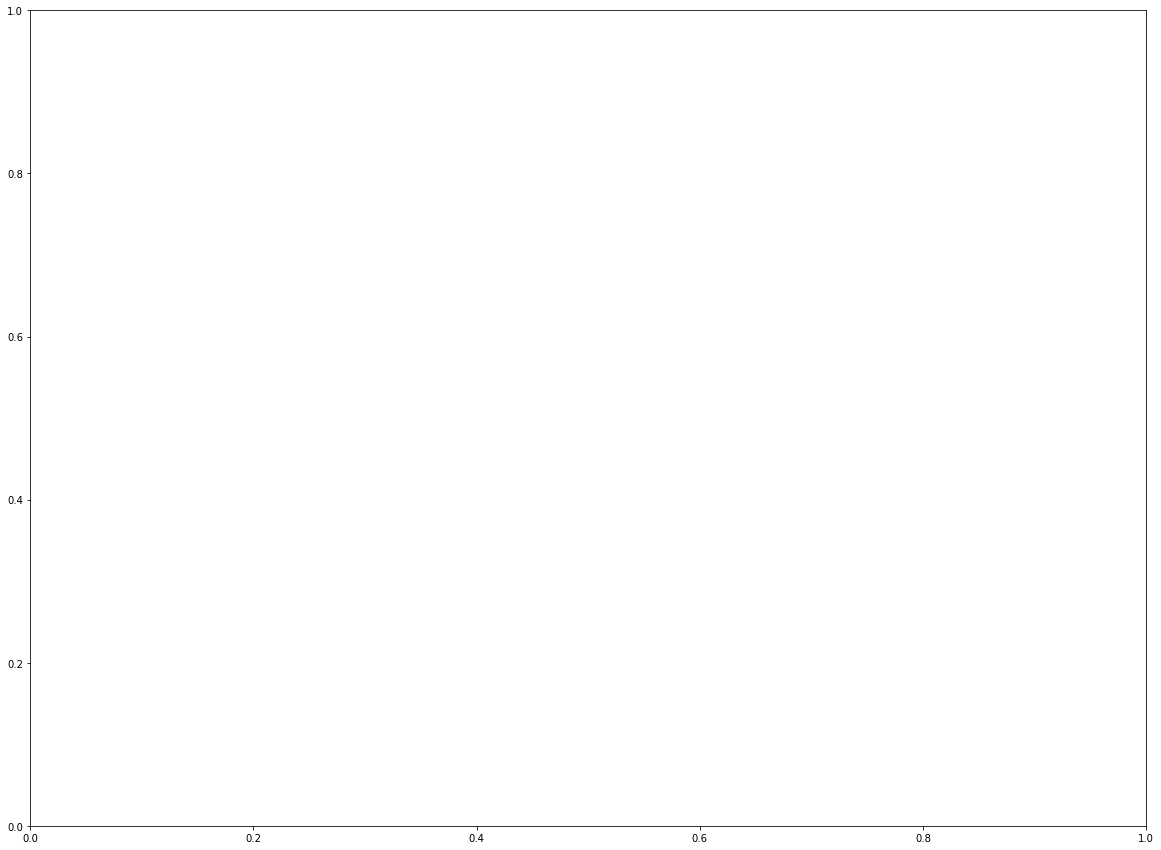

In [16]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = cols,
            class_names   = ['R','NR'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )